## 따릉이 이용자 수와 강수량 간의 상관관계.
### 따릉이: 서울 열린데이터 광장. (data.seoul.go.kr)
### 강수량: 기상청 기상자료개방포털 (data.kma.go.kr)



In [7]:
# 한글 처리를 위한 matplotlib 설정. (실행 후 런타임 세션 다시 시작)
import matplotlib.pyplot as plt

!sudo apt-get install -y fonts-nanum
!sudo fc-cache –fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 1 not upgraded.


In [8]:
!unzip tpss_bcycl_od_statnhm_202510.zip -d tpss_bcycl_od_statnhm_202510

Archive:  tpss_bcycl_od_statnhm_202510.zip
  inflating: tpss_bcycl_od_statnhm_202510/tpss_bcycl_od_statnhm_20251026.csv  
  inflating: tpss_bcycl_od_statnhm_202510/tpss_bcycl_od_statnhm_20251027.csv  
  inflating: tpss_bcycl_od_statnhm_202510/tpss_bcycl_od_statnhm_20251029.csv  
  inflating: tpss_bcycl_od_statnhm_202510/tpss_bcycl_od_statnhm_20251031.csv  
  inflating: tpss_bcycl_od_statnhm_202510/tpss_bcycl_od_statnhm_20251028.csv  
  inflating: tpss_bcycl_od_statnhm_202510/tpss_bcycl_od_statnhm_20251030.csv  
  inflating: tpss_bcycl_od_statnhm_202510/tpss_bcycl_od_statnhm_20251022.csv  
  inflating: tpss_bcycl_od_statnhm_202510/tpss_bcycl_od_statnhm_20251021.csv  
  inflating: tpss_bcycl_od_statnhm_202510/tpss_bcycl_od_statnhm_20251023.csv  
  inflating: tpss_bcycl_od_statnhm_202510/tpss_bcycl_od_statnhm_20251024.csv  
  inflating: tpss_bcycl_od_statnhm_202510/tpss_bcycl_od_statnhm_20251025.csv  
  inflating: tpss_bcycl_od_statnhm_202510/tpss_bcycl_od_statnhm_20251017.csv  
  inflati

In [9]:
import glob
import pandas as pd

# glob 모듈의 glob 함수는 조건에 맞는 파일명을 리스트 형식으로 반환.
all_data_files = glob.glob("tpss_bcycl_od_statnhm_202510/*.csv")
dataframes = []
for filename in all_data_files:
    df = pd.read_csv(filename, encoding='cp949')
    dataframes.append(df)

# axis=0: 행의 방향으로 차곡차곡 쌓음.
df = pd.concat(dataframes, axis=0, ignore_index=True)
df.head()

,기준_날짜,집계_기준,기준_시간대,시작_대여소_ID,시작_대여소명,종료_대여소_ID,종료_대여소명,전체_건수,전체_이용_분,전체_이용_거리
0,20251019,출발시간,1905,ST-2097,창1동_041_1,ST-2097,창1동_041_1,1,47.0,1460.0
1,20251019,출발시간,210,ST-2285,중화2동_023_1,ST-1451,망우본동_060_1,1,22.0,2457.0
2,20251019,출발시간,2135,ST-3369,자양2동_003_2,ST-1857,방이1동_015_2,1,24.0,5068.0
3,20251019,출발시간,1510,ST-963,논현2동_022_1,ST-963,논현2동_022_1,1,16.0,527.0
4,20251019,출발시간,850,ST-2493,방화3동_017_1,ST-2493,방화3동_017_1,1,12.0,760.0


In [10]:
df

,기준_날짜,집계_기준,기준_시간대,시작_대여소_ID,시작_대여소명,종료_대여소_ID,종료_대여소명,전체_건수,전체_이용_분,전체_이용_거리
0,20251019,출발시간,1905,ST-2097,창1동_041_1,ST-2097,창1동_041_1,1,47.0,1460.0
1,20251019,출발시간,210,ST-2285,중화2동_023_1,ST-1451,망우본동_060_1,1,22.0,2457.0
2,20251019,출발시간,2135,ST-3369,자양2동_003_2,ST-1857,방이1동_015_2,1,24.0,5068.0
3,20251019,출발시간,1510,ST-963,논현2동_022_1,ST-963,논현2동_022_1,1,16.0,527.0
4,20251019,출발시간,850,ST-2493,방화3동_017_1,ST-2493,방화3동_017_1,1,12.0,760.0
...,...,...,...,...,...,...,...,...,...,...
6295726,20251009,도착시간,1600,ST-603,공릉2동_029_2,ST-1349,공릉2동_020_1,2,110.0,9189.0
6295727,20251009,도착시간,925,ST-200,아현동_004_1,ST-2976,공덕동_002_1,1,12.0,1390.0
6295728,20251009,도착시간,1130,ST-853,묵1동_015_1,ST-1451,망우본동_060_1,1,12.0,2558.0
6295729,20251009,도착시간,125,ST-1696,구로2동_001_2,ST-21,신수동_021_1,1,60.0,8653.0


In [11]:
# 수치형 데이터 요약.
print('수치형 데이터 요약:\n', df.describe().to_markdown())
# 범주형 데이터 요약.
print('범주형 데이터 요약:\n', df.describe(include=object).to_markdown())

수치형 데이터 요약:
 |       |   기준_날짜 |    기준_시간대 |    전체_건수 |   전체_이용_분 |   전체_이용_거리 |
|:------|------------:|---------------:|-------------:|---------------:|-----------------:|
| count | 6.29573e+06 |    6.29573e+06 |  6.29573e+06 |    6.07734e+06 |      6.07734e+06 |
| mean  | 2.0251e+07  | 1424.76        |  1.06275     |   23.2783      |   2629.29        |
| std   | 9.21939     |  552.203       |  0.281177    |   31.3525      |   3485.93        |
| min   | 2.0251e+07  |    0           |  1           |    1           |    300           |
| 25%   | 2.0251e+07  |  955           |  1           |    6           |    878           |
| 50%   | 2.0251e+07  | 1525           |  1           |   12           |   1512           |
| 75%   | 2.0251e+07  | 1840           |  1           |   27           |   2852           |
| max   | 2.0251e+07  | 2355           | 14           | 7715           | 265506           |
범주형 데이터 요약:
 |        | 집계_기준   | 시작_대여소_ID   | 시작_대여소명   | 종료_대여소_ID   | 종료_대여소명   |
|:---

### 결측치와 이상치 제거.

In [12]:
# 결측치 제거.
df = df.dropna()
# 전체 이용 분 컬럼 값 필터링. (1분 초과 & 180분 미만)
df = df[(df['전체_이용_분'] > 1) & (df['전체_이용_분'] < 180)]
# 전체 이용 거리 컬럼 값 필터링. (10m 초과 & 10000m 미만)
df = df[(df['전체_이용_거리'] > 10) & (df['전체_이용_거리'] < 10000)]
# 집계 기준 컬럼 필터링. (출발시간만 사용)
df = df[df['집계_기준'] == '출발시간']

In [13]:
# 수치형 데이터 요약.
print('수치형 데이터 요약:\n', df.describe().to_markdown())
# 범주형 데이터 요약.
print('범주형 데이터 요약:\n', df.describe(include=object).to_markdown())

수치형 데이터 요약:
 |       |   기준_날짜 |    기준_시간대 |    전체_건수 |   전체_이용_분 |   전체_이용_거리 |
|:------|------------:|---------------:|-------------:|---------------:|-----------------:|
| count | 2.89552e+06 |    2.89552e+06 |  2.89552e+06 |    2.89552e+06 |      2.89552e+06 |
| mean  | 2.0251e+07  | 1405.04        |  1.04957     |   19.8951      |   2093.99        |
| std   | 9.21709     |  552.058       |  0.241537    |   22.5992      |   1834.97        |
| min   | 2.0251e+07  |    0           |  1           |    2           |    300           |
| 25%   | 2.0251e+07  |  940           |  1           |    6           |    862           |
| 50%   | 2.0251e+07  | 1510           |  1           |   11           |   1455           |
| 75%   | 2.0251e+07  | 1830           |  1           |   24           |   2600           |
| max   | 2.0251e+07  | 2355           | 10           |  179           |   9999           |
범주형 데이터 요약:
 |        | 집계_기준   | 시작_대여소_ID   | 시작_대여소명   | 종료_대여소_ID   | 종료_대여소명   |
|:---

### 데이터 형식 변환.

In [14]:
# datetime 형식으로 변환.
df['기준_날짜'] = pd.to_datetime(df['기준_날짜'], format=('%Y%m%d'))

day_of_week_dic = {
    'Monday': '월요일',
    'Tuesday': '화요일',
    'Wednesday': '수요일',
    'Thursday': '목요일',
    'Friday': '금요일',
    'Saturday': '토요일',
    'Sunday': '일요일'
}
df['요일'] = df['기준_날짜'].dt.day_name().map(day_of_week_dic)

In [15]:
df

,기준_날짜,집계_기준,기준_시간대,시작_대여소_ID,시작_대여소명,종료_대여소_ID,종료_대여소명,전체_건수,전체_이용_분,전체_이용_거리,요일
0,2025-10-19,출발시간,1905,ST-2097,창1동_041_1,ST-2097,창1동_041_1,1,47.0,1460.0,일요일
1,2025-10-19,출발시간,210,ST-2285,중화2동_023_1,ST-1451,망우본동_060_1,1,22.0,2457.0,일요일
2,2025-10-19,출발시간,2135,ST-3369,자양2동_003_2,ST-1857,방이1동_015_2,1,24.0,5068.0,일요일
3,2025-10-19,출발시간,1510,ST-963,논현2동_022_1,ST-963,논현2동_022_1,1,16.0,527.0,일요일
4,2025-10-19,출발시간,850,ST-2493,방화3동_017_1,ST-2493,방화3동_017_1,1,12.0,760.0,일요일
...,...,...,...,...,...,...,...,...,...,...,...
6243028,2025-10-09,출발시간,1835,ST-2896,공릉1동_040_2,ST-2223,석관동_001_1,1,18.0,1684.0,목요일
6243029,2025-10-09,출발시간,1400,ST-277,양평2동_017_1,ST-1275,구로5동_040_1,1,49.0,9833.0,목요일
6243030,2025-10-09,출발시간,1310,ST-2037,가양1동_014_2,ST-2993,발산1동_056_2,1,14.0,771.0,목요일
6243031,2025-10-09,출발시간,1830,ST-2270,휘경2동_022_1,ST-2270,휘경2동_022_1,1,53.0,9023.0,목요일


### 요일별 이용량.

In [16]:
# 요일별 이용량 계산.
day_df = df['요일'].value_counts().reindex(day_of_week_dic.values())
print('요일별 이용량:\n', day_df)

요일별 이용량:
 요일
월요일    256186
화요일    367741
수요일    592526
목요일    626048
금요일    441452
토요일    319875
일요일    291688
Name: count, dtype: int64


### 요일별 이용량을 시각화.

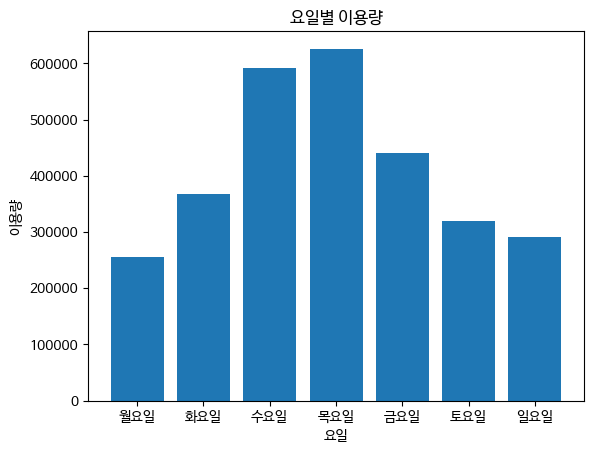

In [17]:
import matplotlib.pyplot as plt

# x축: day_df.index, y축: day_df.values
plt.bar(day_df.index, day_df.values)
plt.title('요일별 이용량')
plt.xlabel('요일')
plt.ylabel('이용량')
plt.show()

### 시간별 이용량 분석.

In [18]:
df.head()
# 기준 시간대에서 '1905'=19시 05분.

,기준_날짜,집계_기준,기준_시간대,시작_대여소_ID,시작_대여소명,종료_대여소_ID,종료_대여소명,전체_건수,전체_이용_분,전체_이용_거리,요일
0,2025-10-19,출발시간,1905,ST-2097,창1동_041_1,ST-2097,창1동_041_1,1,47.0,1460.0,일요일
1,2025-10-19,출발시간,210,ST-2285,중화2동_023_1,ST-1451,망우본동_060_1,1,22.0,2457.0,일요일
2,2025-10-19,출발시간,2135,ST-3369,자양2동_003_2,ST-1857,방이1동_015_2,1,24.0,5068.0,일요일
3,2025-10-19,출발시간,1510,ST-963,논현2동_022_1,ST-963,논현2동_022_1,1,16.0,527.0,일요일
4,2025-10-19,출발시간,850,ST-2493,방화3동_017_1,ST-2493,방화3동_017_1,1,12.0,760.0,일요일


In [23]:
df['출발_시'] = df['기준_시간대'] // 100
# 시간순 정렬.
hour_df = df['출발_시'].value_counts().sort_index()
print('시간별 이용량:\n', hour_df)

시간별 이용량:
 출발_시
0      55001
1      38421
2      25589
3      19211
4      16090
5      29148
6      61955
7     152005
8     227732
9     133621
10    107783
11    124815
12    135544
13    140590
14    144494
15    163084
16    197365
17    246243
18    261937
19    171548
20    144490
21    133357
22    110359
23     55134
Name: count, dtype: int64


### 시간별 이용량 시각화.

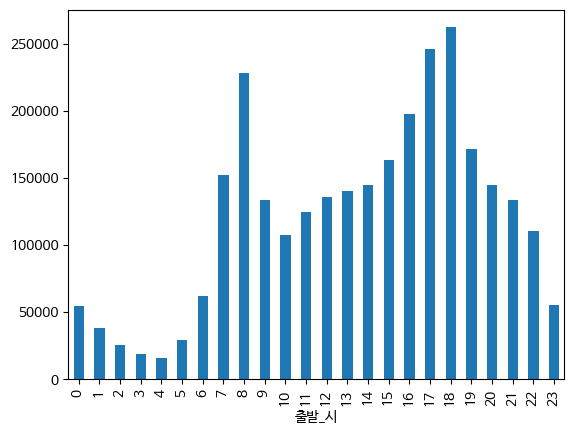

In [26]:
hour_df.plot(kind='bar')
plt.show()

### 일자별 이용량 분석.

In [27]:
# 일자별 이용량 계산 및 정렬.
daily_usage_df = df['기준_날짜'].value_counts().sort_index()
print('일자별 이용량:\n', daily_usage_df)

일자별 이용량:
 기준_날짜
2025-10-01    146352
2025-10-02    149962
2025-10-03     72456
2025-10-04     89987
2025-10-05     43460
2025-10-06      9095
2025-10-07     22058
2025-10-08     93123
2025-10-09     89067
2025-10-10     12490
2025-10-11     46642
2025-10-12     86865
2025-10-13     25808
2025-10-14    114723
2025-10-15    105644
2025-10-16    132216
2025-10-17     98964
2025-10-18     81372
2025-10-19     92993
2025-10-20    115341
2025-10-21    118432
2025-10-22    126540
2025-10-23    131878
2025-10-24    133518
2025-10-25    101874
2025-10-26     68370
2025-10-27    105942
2025-10-28    112528
2025-10-29    120867
2025-10-30    122925
2025-10-31    124024
Name: count, dtype: int64


 ### 일자별 이용량 시각화.

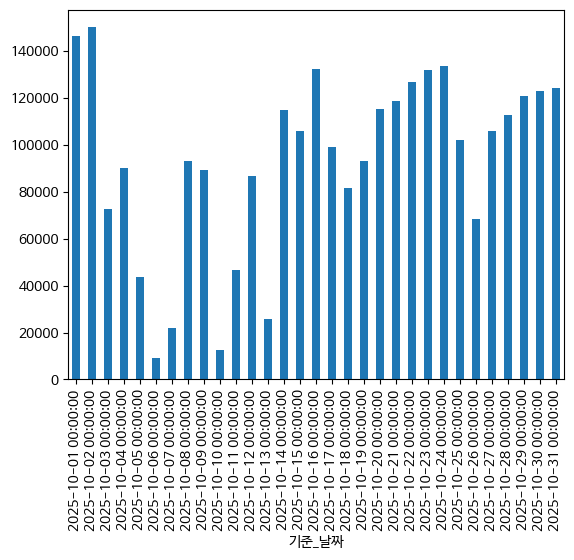

In [28]:
daily_usage_df.plot(kind='bar')
plt.show()

### 강수량 데이터.

In [36]:
file_path = '202510_seoul_precipitation.csv'
# skiprows=12: 12행까진 데이터와 관련없는 정보라서 건너뜀.
precipitation_df = pd.read_csv(file_path, encoding='cp949', skiprows=12)
precipitation_df.head()

,\t지점번호,지점명,일시,강수량(mm),1시간최다강수량(mm),1시간최다강수량시각,Unnamed: 6
0,108,서울,2025-10-01,NaN,NaN,NaN,NaN
1,108,서울,2025-10-02,NaN,NaN,NaN,NaN
2,108,서울,2025-10-03,0.8,0.3,03:30,NaN
3,108,서울,2025-10-04,0.0,0.0,NaN,NaN
4,108,서울,2025-10-05,18.1,10.4,10:01,NaN


### 강수량 데이터 전처리.

In [31]:
precipitation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   	지점번호         30 non-null     int64  
 1   지점명           30 non-null     object 
 2   일시            30 non-null     object 
 3   강수량(mm)       17 non-null     float64
 4   1시간최다강수량(mm)  17 non-null     float64
 5   1시간최다강수량시각    13 non-null     object 
 6   Unnamed: 6    0 non-null      float64
dtypes: float64(3), int64(1), object(3)
memory usage: 1.8+ KB


In [37]:
# 일시 컬럼의 타입 변환.
precipitation_df['일시'] = pd.to_datetime(precipitation_df['일시'], format='%Y-%m-%d')
# 결측치는 0으로 채움.
precipitation_df['강수량(mm)'] = precipitation_df['강수량(mm)'].fillna(0)
precipitation_df.drop(columns=['\t지점번호', 'Unnamed: 6'], inplace=True)

In [38]:
precipitation_df

,지점명,일시,강수량(mm),1시간최다강수량(mm),1시간최다강수량시각
0,서울,2025-10-01,0.0,NaN,NaN
1,서울,2025-10-02,0.0,NaN,NaN
2,서울,2025-10-03,0.8,0.3,03:30
3,서울,2025-10-04,0.0,0.0,NaN
4,서울,2025-10-05,18.1,10.4,10:01
5,서울,2025-10-06,36.8,8.1,22:49
6,서울,2025-10-07,7.1,2.0,-23:50
7,서울,2025-10-08,0.0,0.0,NaN
8,서울,2025-10-09,0.0,0.2,NaN
9,서울,2025-10-10,49.3,7.0,18:59


### 일자별 이용량 데이터와 강수량 데이터 병합.

In [42]:
# daily_usage_gf의 기준_날짜, rain_df의 일시를 기준으로 결합. (기준 df: daily_usage_df)
merged_df = pd.merge(daily_usage_df, precipitation_df, how='left', left_on='기준_날짜', right_on='일시')
merged_df.head()

,count,지점명,일시,강수량(mm),1시간최다강수량(mm),1시간최다강수량시각
0,146352,서울,2025-10-01,0.0,NaN,NaN
1,149962,서울,2025-10-02,0.0,NaN,NaN
2,72456,서울,2025-10-03,0.8,0.3,03:30
3,89987,서울,2025-10-04,0.0,0.0,NaN
4,43460,서울,2025-10-05,18.1,10.4,10:01


In [44]:
# 컬럼명 변경: count -> 이용량.
merged_df.rename(columns={'count': '이용량'}, inplace=True)
merged_df.head()

,이용량,지점명,일시,강수량(mm),1시간최다강수량(mm),1시간최다강수량시각
0,146352,서울,2025-10-01,0.0,NaN,NaN
1,149962,서울,2025-10-02,0.0,NaN,NaN
2,72456,서울,2025-10-03,0.8,0.3,03:30
3,89987,서울,2025-10-04,0.0,0.0,NaN
4,43460,서울,2025-10-05,18.1,10.4,10:01


### 이용량과 강수량 시각화.

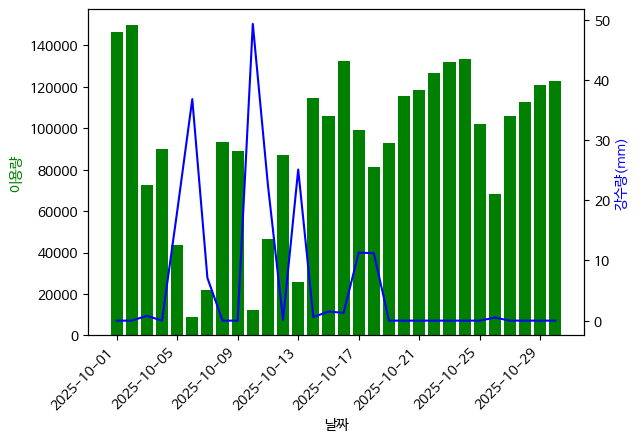

In [49]:
# 2개의 y축을 가진 서브플롯 생성.
fig, ax1 = plt.subplots()
# 2번째 y축 생성.
ax2 = ax1.twinx()

ax1.bar(merged_df['일시'], merged_df['이용량'], color='g')
ax2.plot(merged_df['일시'], merged_df['강수량(mm)'], color='b')
ax1.set_xlabel('날짜')
# x축 날짜(date) 레이블이 겹치지 않도록 자동으로 정렬 및 회전.
fig.autofmt_xdate(rotation=45)
ax1.set_ylabel('이용량', color='g')
ax2.set_ylabel('강수량(mm)', color='b')
plt.show()

### 강수량과 이용량 상관관계.

강수량과 이용량의 상관계수: -0.7666934451100629


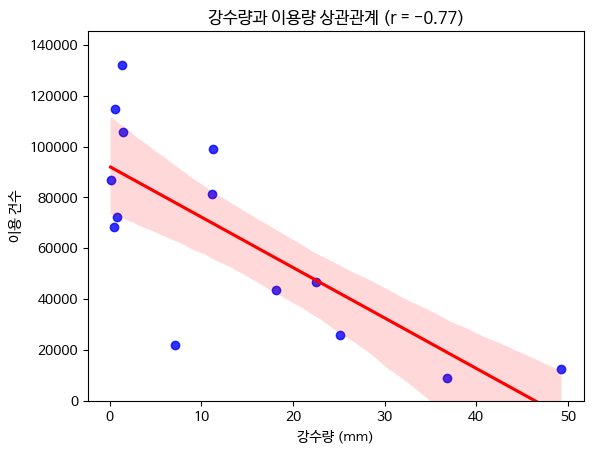

In [51]:
import seaborn as sns

# 강수량이 있는 날만 필터링.
merged_onlyrain_df = merged_df[merged_df['강수량(mm)'] > 0]
# 강수량과 이용량의 상관계수 계산.
corr = merged_onlyrain_df['이용량'].corr(merged_onlyrain_df['강수량(mm)'])
print('강수량과 이용량의 상관계수:', corr)

## 강수량과 이용량의 회귀선 그래프 생성
ax = sns.regplot(x='강수량(mm)', y='이용량',
                 data=merged_onlyrain_df,
                 scatter_kws={'color': 'blue'},
                 line_kws={'color': 'red'})

## y축 범위 설정
plt.ylim(0, merged_onlyrain_df['이용량'].max()*1.1)

plt.title(f'강수량과 이용량 상관관계 (r = {corr:.2f})')
plt.xlabel('강수량 (mm)')
plt.ylabel('이용 건수')
plt.show()

### OLS 회귀 모델 생성 및 분석 및 귀무가설 검증.

In [63]:
import statsmodels.formula.api as smf

merged_onlyrain_df = merged_onlyrain_df.copy()
# 컬럼명 변경: '강수량(mm)' -> '강수량_mm'. (formula API 호환을 위해)
merged_onlyrain_df.rename(columns={'강수량(mm)': '강수량_mm'}, inplace=True)

# OLS 모델 정의 및 학습.
'''
이용량 (종속변수, Y): 물결표(~)의 왼쪽. 예측하고 싶은 값.
~ (물결표): "관련이 있다", "에 의해 결정된다"는 뜻의 기호.
강수량 (독립변수, X): 물결표(~)의 오른쪽.
'''
model = smf.ols(formula='이용량 ~ 강수량_mm', data=merged_onlyrain_df)
results = model.fit()

# 모델 요약 결과 출력.
print(results.summary())

'''
귀무가설 검증 해석.
 강수량_mm 계수에 대한 p-value를 확인하여 귀무가설 (강수량이 이용량에 미치는 영향이 0이다) 검증.
 일반적으로 p-value가 0.05 미만이면 귀무가설을 기각하고 유의미한 영향이 있다고 해석.
'''
print('\n----- 귀무가설 검증 (강수량 계수) -----')
p_value = results.pvalues['강수량_mm']
print(f'강수량_mm 계수의 p-value: {p_value:.6f}')
if p_value < 0.05:
    print('''p-value가 0.05보다 작으므로 귀무가설을 기각함.
즉, 강수량은 자전거 이용량에 통계적으로 유의미한 영향을 미치고 있음.''')
else:
    print('''p-value가 0.05보다 크므로 귀무가설을 기각할 수 없음.
즉, 강수량은 자전거 이용량에 통계적으로 유의미한 영향을 미치지 않는다고 할 수 있음.''')

                            OLS Regression Results                            
Dep. Variable:                    이용량   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     17.11
Date:                Fri, 19 Dec 2025   Prob (F-statistic):            0.00138
Time:                        14:20:37   Log-Likelihood:                -161.45
No. Observations:                  14   AIC:                             326.9
Df Residuals:                      12   BIC:                             328.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.214e+04   9563.253      9.634      0.0